In [ ]:
prova = Audio("/mnt/f/PhD/_Segments/44kHz/15s/pan_audio_160224_ult1_group5_0011.wav", 44100)
signal_au, sr = prova.load(normalize=False)
plt.plot(signal_au)

In [ ]:
import pandas as pd

df = pd.DataFrame(mid.transpose(), columns=mid_names)
df

In [ ]:
from pyAudioAnalysis import audioBasicIO

[sig, x] = audioBasicIO.read_audio_file("/mnt/f/PhD/_Segments/44kHz/15s/pan_audio_160224_ult1_group5_0011.wav")
x

In [4]:
mid, short, mid_names = MidTermFeatures.mid_feature_extraction(x, 44100, 5.0*44100, 5.0*44100, 0.050*44100, 0.025*44100)
df = pd.DataFrame(mid.transpose(), columns=mid_names)
df

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,delta chroma_4_kurtosis,delta chroma_5_kurtosis,delta chroma_6_kurtosis,delta chroma_7_kurtosis,delta chroma_8_kurtosis,delta chroma_9_kurtosis,delta chroma_10_kurtosis,delta chroma_11_kurtosis,delta chroma_12_kurtosis,delta chroma_std_kurtosis
0,0.063968,0.004591,3.163498,0.132331,0.162972,0.47525,0.002684,0.0954,-26.163431,1.658127,...,4.641774,3.644048,4.554538,2.180166,5.819222,2.854223,2.923262,2.981489,28.500135,1.168233
1,0.052666,0.001623,3.189023,0.125297,0.169571,0.290566,0.003472,0.065099,-27.726184,2.122959,...,5.342299,8.309539,10.318567,1.524412,9.917951,34.599845,7.359853,13.674627,4.398547,0.088872
2,0.045235,0.012054,3.165104,0.109706,0.155222,0.235214,0.004216,0.060533,-25.859031,2.368291,...,6.946889,7.834902,5.541253,1.071198,15.13779,3.053349,2.729062,2.993538,17.431909,0.3235


In [90]:
from speechbrain.pretrained import VAD

VAD = VAD.from_hparams(
    source="speechbrain/vad-crdnn-libriparty",
    savedir="/mnt/c/Users/nicor/PycharmProjects/AudioAnalysis/tmpdir"
)

In [91]:
import librosa as lb


boundaries = VAD.get_speech_segments("/mnt/e/Nicola/16kKz/15s/IB4001.Mix-Headset_026.wav", large_chunk_size=5, small_chunk_size=2, 
overlap_small_chunk=True, apply_energy_VAD=True, double_check=True, en_activation_th=0.23, en_deactivation_th=0.20, close_th=0.25, len_th=0.5)

In [92]:
boundaries

tensor([[ 0.0000,  1.5000],
        [ 1.8900, 11.0800],
        [12.3500, 14.9700]])

In [1]:
from modules import Audio

In [47]:
audio = Audio("/mnt/f/PhD/_Segments/44kHz/15s/ta2/Idiap-2010-01-room01_audio01M_trimmed_16kHz_sync_0032.wav", 44100)
signal = audio.load()

In [52]:
denoised = audio.denoise(signal, save=True, prop_decrease=0.9)

  0%|          | 0/111 [00:00<?, ?it/s]

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

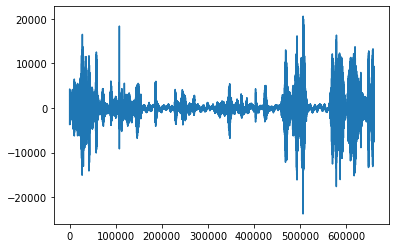

In [54]:
plt.plot(signal)

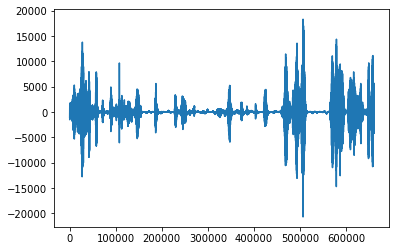

In [55]:
plt.plot(denoised)

In [ ]:
from modules import AudioFeature
import pandas as pd

In [ ]:
features = AudioFeature()

In [ ]:
turn_extractor = features.TurnTaking()
prosody_extractor = features.Prosody()

In [ ]:
turn_take = turn_extractor("/mnt/f/PhD/_Segments/Segmented15s/.selected_audio/ami/IB4001.Mix-Headset_0091.wav")
mid = prosody_extractor("/mnt/f/PhD/_Segments/Segmented15s/.selected_audio/ami/IB4001.Mix-Headset_0091.wav")

In [ ]:
turn_take

In [ ]:
features(turn_take, mid)

In [ ]:
interval = pd.interval_range(start=0, end=15, freq=5)
interval_overlap = pd.interval_range(start=4, end=15, freq=5)
time_samples = interval.union(interval_overlap)

postprocessed_df = pd.DataFrame(index=time_samples)

In [ ]:
postprocessed_df = pd.DataFrame(index=time_samples)
for start, end in zip(vad.Start, vad.End):
    for i in range(len(time_samples)):
        if start in time_samples[i]:
            postprocessed_df.loc[time_samples[i], 'Start'] = start
            postprocessed_df.loc[time_samples[i], 'End'] = time_samples[i].right
        else:
            postprocessed_df.loc[time_samples[i], 'Start'] = 0
        if end in time_samples[i]:
            postprocessed_df.loc[time_samples[i], 'Start'] = time_samples[i].left
            postprocessed_df.loc[time_samples[i], 'End'] = end
        else:
            postprocessed_df.loc[time_samples[i], 'End'] = 0

In [ ]:
postprocessed_df

In [ ]:
import librosa as lb

stream = lb.stream("/mnt/f/PhD/_Segments/Segmented15s/.selected_audio/ami/IB4001.Mix-Headset_0091.wav", block_length=1, mono=True, frame_length=220500, hop_length=176400, fill_value=0)

In [ ]:
for block in stream:
    print(block)
    


In [1]:
import opensmile

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
    num_workers=4,
    multiprocessing=True
)
smile.feature_names


['audspec_lengthL1norm_sma_range',
 'audspec_lengthL1norm_sma_maxPos',
 'audspec_lengthL1norm_sma_minPos',
 'audspec_lengthL1norm_sma_quartile1',
 'audspec_lengthL1norm_sma_quartile2',
 'audspec_lengthL1norm_sma_quartile3',
 'audspec_lengthL1norm_sma_iqr1-2',
 'audspec_lengthL1norm_sma_iqr2-3',
 'audspec_lengthL1norm_sma_iqr1-3',
 'audspec_lengthL1norm_sma_percentile1.0',
 'audspec_lengthL1norm_sma_percentile99.0',
 'audspec_lengthL1norm_sma_pctlrange0-1',
 'audspec_lengthL1norm_sma_stddev',
 'audspec_lengthL1norm_sma_skewness',
 'audspec_lengthL1norm_sma_kurtosis',
 'audspec_lengthL1norm_sma_meanSegLen',
 'audspec_lengthL1norm_sma_maxSegLen',
 'audspec_lengthL1norm_sma_minSegLen',
 'audspec_lengthL1norm_sma_segLenStddev',
 'audspec_lengthL1norm_sma_upleveltime25',
 'audspec_lengthL1norm_sma_upleveltime50',
 'audspec_lengthL1norm_sma_upleveltime75',
 'audspec_lengthL1norm_sma_upleveltime90',
 'audspec_lengthL1norm_sma_risetime',
 'audspec_lengthL1norm_sma_leftctime',
 'audspec_lengthL1

In [2]:
with open("C:\\Users\\nicor\\OneDrive\\Desktop\\feat.txt", "w") as feat:
    for feats in smile.feature_names:
        feat.write(feats+"\n")


In [109]:
postprocessed_df = pd.DataFrame(index=time_samples)
for start, end in zip(vad.Start, vad.End):
    for i in range(len(time_samples)):
        if start in time_samples[i]:
            postprocessed_df.loc[time_samples[i], 'Start'] = start
            postprocessed_df.loc[time_samples[i], 'End'] = time_samples[i].right
        else:
            postprocessed_df.loc[time_samples[i], 'Start'] = 0
        if end in time_samples[i]:
            postprocessed_df.loc[time_samples[i], 'Start'] = time_samples[i].left
            postprocessed_df.loc[time_samples[i], 'End'] = end
        else:
            postprocessed_df.loc[time_samples[i], 'End'] = 0

In [107]:
postprocessed_df

,Start,End
"(0, 5]",0.000000,NaN
"(4, 9]",0.000000,NaN
"(5, 10]",0.000000,NaN
"(9, 14]",11.365313,14.0
"(10, 15]",11.365313,15.0


In [13]:
import librosa as lb

stream = lb.stream("/mnt/f/PhD/_Segments/Segmented15s/.selected_audio/ami/IB4001.Mix-Headset_0091.wav", block_length=1, mono=True, frame_length=220500, hop_length=176400, fill_value=0)

In [14]:
for block in stream:
    print(block)
    


[ 0.00265503  0.00195312  0.00183105 ...  0.01715088  0.00341797
 -0.01165771]
[-0.00064087 -0.00061035 -0.00048828 ... -0.00430298  0.00073242
  0.00872803]
[ 7.9345703e-03  9.0637207e-03  1.0803223e-02 ...  4.5776367e-04
  6.1035156e-05 -3.0517578e-04]
[0.00646973 0.0065918  0.00665283 ... 0.         0.         0.        ]


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline